# About This Notebook
* The following notebooks utilizes the [generated outputs](https://www.kaggle.com/usaiprashanth/gptmodel-outputs) and performs some Exploratory Data Analysis
* The following notebook is from this [kaggle notebook](https://www.kaggle.com/usaiprashanth/gpt-eda?scriptVersionId=72798831)

In [ ]:
#loading the outputs
import joblib
withoutshuffle = joblib.load('../input/gptmodel-outputs/results (4)/withoutshuffle.pkl')
withshuffle = joblib.load('../input/gptmodel-outputs/results (3)/withshuffle.pkl')

* Data @param withshuffle and @param withoutshuffle are nested arrays with following structure

> array[0] index of the document with respect to THE PILE dataset

> array[1] length of the document

> array[2] the score of the document (number of correctly predicted labels)

* The folllowing two graphs compare the score of the model with and without shuffling the evaluation data
* More information about shuffling can be found [here](https://www.kaggle.com/usaiprashanth/gpt-1-3b-model?scriptVersionId=72760342) and [here](https://www.kaggle.com/usaiprashanth/gpt-1-3b-model?scriptVersionId=72761073)

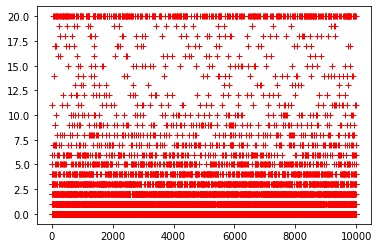

In [ ]:
import matplotlib.pyplot as plt
plt.plot(withshuffle[0],withshuffle[2],'r+')

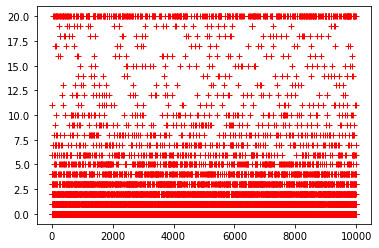

In [ ]:
plt.plot(withoutshuffle[0],withoutshuffle[2],'r+')

* My original interpretation of this idea (which has been proved wrong) was that the order in which the data would be evaluated would effect the evaluation loss of model. Which is inherently false. The reasoning for this is due to the fact of there being randomness involved with the model.

* Dividing the array into 1000 buckets and plotting their average score

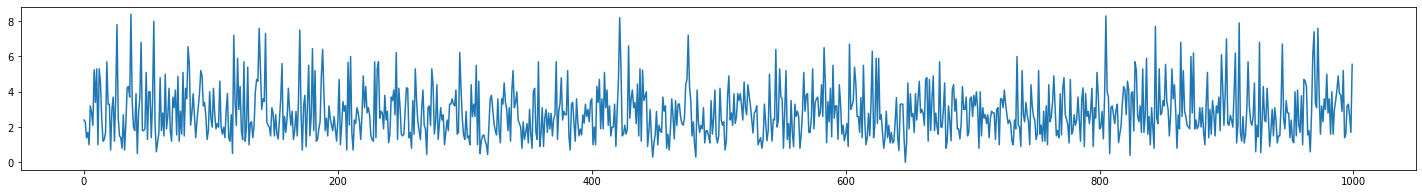

In [ ]:
buckets = []
plt.rcParams["figure.figsize"] = (25,3)
import numpy as np
for i in range(0,10000,10):
    buckets.append(np.nanmean(withoutshuffle[2][i:i+10]))
plt.plot(buckets)

* Atleast for the first 10,000 samples, there doesn't seem to be any difference in the memorization of data with respect to it's position in the dataset.
* However, It is worth noting that 10,000 samples is a very small sampling for a dataset as big as [The Pile](https://pile.eleuther.ai/) and the results can significantly differ when evaluated with another shard of the dataset.